In [1]:
# Importing modules
import numpy as np
from data_loader import load_npy
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Local modules
import postprocessing
import segmap

In [3]:
DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/img_3_sample_train")
# DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/img_3_sample_valid_centered_small")

In [4]:
img_arr = load_npy(DATASET_PATH / "dataset_images_aug.npy") /255
ann_arr = load_npy(DATASET_PATH / "dataset_annots_aug.npy")

In [5]:
# def Tile_3x3(ann_arr, tile_cfg):
#     a, b = tile_cfg
#     arr_size = ann_arr.shape[0]
#     S1 = np.zeros((arr_size,a,a))
#     S2 = np.zeros((arr_size,a,b))
#     S3 = np.zeros((arr_size,a,a))
#     S4 = np.zeros((arr_size,b,a))
#     S5 = np.zeros((arr_size,b,b))
#     S6 = np.zeros((arr_size,b,a))
#     S7 = np.zeros((arr_size,a,a))
#     S8 = np.zeros((arr_size,a,b))
#     S9 = np.zeros((arr_size,a,a))

#     S1 = ann_arr[:, 0:a,    0:a,    0]
#     S2 = ann_arr[:, 0:a,    a:a+b,  0]
#     S3 = ann_arr[:, 0:a,    a+b:,   0]
#     S4 = ann_arr[:, a:a+b,  0:a,    0]
#     S5 = ann_arr[:, a:a+b,  a:a+b,  0]
#     S6 = ann_arr[:, a:a+b,  a+b:,   0]
#     S7 = ann_arr[:, a+b:,   0:a,    0]
#     S8 = ann_arr[:, a+b:,   a:a+b,  0]
#     S9 = ann_arr[:, a+b:,   a+b:,   0]

#     return [S1, S2, S3, S4, S5, S6, S7, S8, S9]

In [6]:
index = 16
sample_im = img_arr[index,:,:,:3]
sample_an = ann_arr[index,:,:,0]

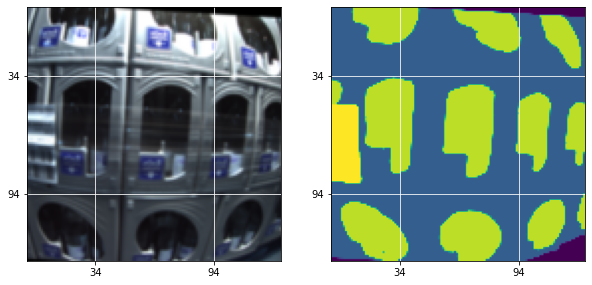

In [21]:
width = sample_im.shape[0]

# Splitting the image with the formula width = 2a + b
# Set b, b contributes to the dim of the inner square
b = 60
a = int((width - b) / 2)

ticks = np.array([a, width-a])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(sample_im)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.grid(color="white")

ax = fig.add_subplot(1,2,2)
plt.imshow(sample_an)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.grid(color="white")

plt.show()

In [22]:
def Tile_3x3(annot_i, tile_cfg):
    a, b = tile_cfg
    S1 = np.zeros((a,a))
    S2 = np.zeros((a,b))
    S3 = np.zeros((a,a))
    S4 = np.zeros((b,a))
    S5 = np.zeros((b,b))
    S6 = np.zeros((b,a))
    S7 = np.zeros((a,a))
    S8 = np.zeros((a,b))
    S9 = np.zeros((a,a))

    S1 = annot_i[0:a,    0:a,    0]
    S2 = annot_i[0:a,    a:a+b,  0]
    S3 = annot_i[0:a,    a+b:,   0]
    S4 = annot_i[a:a+b,  0:a,    0]
    S5 = annot_i[a:a+b,  a:a+b,  0]
    S6 = annot_i[a:a+b,  a+b:,   0]
    S7 = annot_i[a+b:,   0:a,    0]
    S8 = annot_i[a+b:,   a:a+b,  0]
    S9 = annot_i[a+b:,   a+b:,   0]

    return [S1, S2, S3, S4, S5, S6, S7, S8, S9]

In [23]:
sectors_img = Tile_3x3(img_arr[index], (a, b))
sectors_ann = Tile_3x3(ann_arr[index], (a, b))

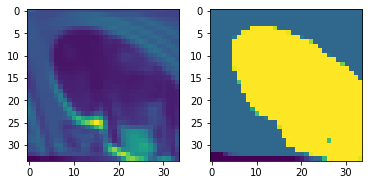

In [24]:
sec_no = 6
sec_img = sectors_img[sec_no]
sec_ann = sectors_ann[sec_no]
plt.subplot(1,2,1)
plt.imshow(sec_img)
plt.subplot(1,2,2)
plt.imshow(sec_ann)
plt.show()

In [11]:
seg_obj = segmap.SegmentaionMap(sec_ann)

In [12]:
def get_sec_densities(sectors_ann):
    # All class densities for one image
    class_densities = []
    for sector in sectors_ann:
        seg_obj = segmap.SegmentaionMap(sector)
        class_densities.append(np.asarray(seg_obj.activation_density()))

    return np.asarray(class_densities)

In [13]:
class_densities = get_sec_densities(sectors_ann)

In [14]:
class_densities.shape

(9,)

In [15]:
# The class with the highest average
np.mean(class_densities, axis=0)

ValueError: operands could not be broadcast together with shapes (10,) (11,) 

### Getting densities from all annotations in the dataset

In [ ]:
ann_arr.shape

In [ ]:
# num_classes = 10
densites_arr = []
for annot in range(ann_arr.shape[0]):
    sectors_ann = Tile_3x3(ann_arr[index], (a, b))
    sectors_den = get_sec_densities(sectors_ann)
    densites_arr.append(sectors_den)

densites_arr = np.asarray(densites_arr)

In [ ]:
densites_arr.shape

In [ ]:
def get_class_info(class_den_list):
    return np.argmax(np.mean(class_den_list, axis=0))

In [ ]:
get_class_info(densites_arr[-1,:,:])